# 1. Introduction

This project aims to apply the data science knowledge as part of the CodSoft Data Science internship program. In this first task, concepts such as Exploratory Data Analysis (EDA), data preparation and evaluation techniques, descriptive statistics, and the application of Principal Component Analysis (PCA) will be implemented using a real-world dataset. Additionally, this project will involve the practical use of various Python libraries and functions within the Jupyter Notebook environment.

The primary goal of this assignment is to develop a foundational and hands-on understanding of the typical tasks performed by a Data Analyst in a professional setting.

For this project, interns are required to perform an Exploratory Data Analysis on a dataset provided by the Data Preparation instructor. The selected dataset is based on the Titanic — a historical dataset that contains detailed information about the passengers aboard the RMS Titanic, including features such as age, gender, ticket class, fare, and survival status.

In this dataset, the dependent variable is the Survival status of each passenger, which indicates whether the individual survived (1) or not (0) during the shipwreck. The remaining variables serve as features that may help in understanding the patterns and factors that influenced survival. The objective of the analysis is to extract insights from the data, identify significant patterns, and explore how different variables relate to the survival outcome.

# 2. Data Dictionary

* **Passenger Id** : Passenger list
* **Survived** :	**0** = No, **1** = Yes
* **Pclass** : Ticket class	 **1** = 1st, **2** = 2nd, **3** = 3rd
* **Name**: Name of the passenger        
* **Sex**: Genre of the passenger        
* **Age**: Age in Years         
* **SibSp** : Number of siblings / spouses aboard the Titanic        
* **Parch** : Number of parents / children aboard the Titanic
* **Ticket** : Ticket number
* **Fare** : Passenger fare
* **Cabin** : Cabin number
* **Embarked** : Port of Embarkation      	**C** = Cherbourg, **Q** = Queenstown, **S** = Southampton

# 3. Importing Libraries and Dataset

To begin the assignment, the necessary libraries will be imported. In this particular case, only three libraries will be initially imported: pandas, numpy, and seaborn. Any additional libraries required throughout the project will be imported as needed.

Pandas is an open source high-level data manipulation tool, used to analyze, explore, and clean data in Python. It provides ready to use high-performance data structures and data analysis tools.

Numpy it’s a open source project and it can be used to perform a wide variety of mathematical operations on arrays. Used for scientific computing in Python, it also has functions to work on linear algebra, fourier transform, and matrices. 

Seaborn is a data visualization library that it’s used to visualize random distributions. “It provides a high-level interface for drawing attractive and informative statistical graphics”, according to its own definition on their website.

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np

After importing the necessary libraries, the CSV file containing the dataset will be imported using the pd.read_csv function. The original dataset will be assigned the name df to distinguish it from any modified datasets that may be generated later.

In [2]:
#Importing Dataset
df= pd.read_csv('Titanic-Dataset.csv')

# 4. Exploratory Data Analysis

The Exploratory Data Analysis (EDA) of the dataset will now be conducted. The first step involves using the .shape function, which provides information about the size of the dataset. Specifically, it returns the number of rows and columns, allowing a clear understanding of the dataset’s overall dimensions.

In [3]:
df.shape

(891, 12)

The Titanic dataset consists of 891 rows and 12 columns, which indicates that it is a relatively small dataset. This manageable size allows for efficient analysis and visualization during the exploratory phase.

Next, the .columns function will be used to identify the information included in the dataset. This function provides a list of the column names, giving an overview of the features available for analysis. Although the data dictionary also provides some details about each column, this function helps to confirm the structure of the dataset.

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

This column contains information about the passengers' names, the fare they paid for the ticket, their sex, age, the cabin class they traveled in, among other details.

The .info() and .dtypes functiosn will now be used. These functions provides insight into the data types of each column, helping to identify whether the information is numeric or alphabetical, and whether it is categorized as object, int64, or float64.

Object columns typically contain textual or categorical data, such as names, locations, or other non-numeric information.

int64 columns represent integer values (whole numbers), which might be used for features such as passenger IDs or age, if not expressed in decimal form.

float64 columns contain numeric values with decimals, which could be used for continuous data such as the fare paid, or other features that require precise numerical representation.

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The output of the .info() function provides a general overview of the dataset's structure. It reveals that the dataset contains a mix of data types, including numeric columns (such as integers and floats) and categorical columns (such as objects). Additionally, it is evident that some columns contain missing data, such as Age, Cabin, and Embarked, which will need to be addressed during the data preparation process. Overall, this information gives an initial understanding of the dataset's composition and the types of preprocessing that may be required.

Next, the .head(15) function will be used to display the first 15 rows of the dataset. This allows for an initial inspection of the data, providing a general overview of the information contained in the dataset.

In [7]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Immediately we can see that most of the data records are numerical, also we can observe lots of repeating values in some columns, which could be duplicate data  or it can also be a number of series or parts of the trucks analyzed, but we can't know for sure because a lot of this information is confidential.
On the second column we can see the 'survived' column, thanks to the Data Dictionary we already know that we have two types : 0 (not survived) or 1 (survived).  The next step will be to see how the data is distributed between classes.

In [8]:
df_not_survived = df.loc[df['Survived'] == 0]

In [9]:
df_not_survived.shape

(549, 12)

In [10]:
df_survived = df.loc[df['Survived'] == 1]
df_survived.shape

(342, 12)

By using the .shape function, it is observed that there are 549 records corresponding to passengers who didn't survived the tragedy. This provides an initial sense of the distribution of the target variable and the proportion of survivors within the dataset.

# 4.1 Data Cleaning

Before proceeding with the data cleaning, we will proceed to verify if there is duplicate data within our dataset. We can obtain this with the .duplicated() function and we will add the .sum() function to have the total count, in case of finding duplicate data.

In [11]:
print(df.duplicated().sum())

0


The code returned a negative response. There is no duplicate data.

Now it's time to know how many missing values we have in our dataset. Running the isna().sum() method it's going to return the number of missing values in each column.

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.isna().sum().sum()

866

By using the .isna().sum() function, it is identified that the dataset contains missing values in several columns. Specifically, there are 177 missing values in the Age column, 687 in the Cabin column, and 2 in the Embarked column. In total, the dataset contains 866 missing values, which highlights the need for appropriate data cleaning and imputation strategies before proceeding with further analysis.

The PassengerId column will be removed from the dataset, as it is not considered relevant for the analysis. This column simply represents a sequential identifier for each row and does not provide meaningful information for modeling or interpretation.

In [14]:
df.drop(columns=['PassengerId'],inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.shape

(891, 11)

After removing the PassengerId column, the dataset is reduced to a total of 11 columns, focusing only on the features that may provide meaningful insights for the analysis.

We are going to import matplotlib, which is a library that creates interactive plots in Python. In this way we will be able to have a graphic reference of how the classes are distributed.

In [16]:
from matplotlib import pyplot as plt

In [17]:
#Displaying Percentage of missing Data
missing_data = df.isna().sum()/100
missing_values = pd.DataFrame({'column_name': df.columns})

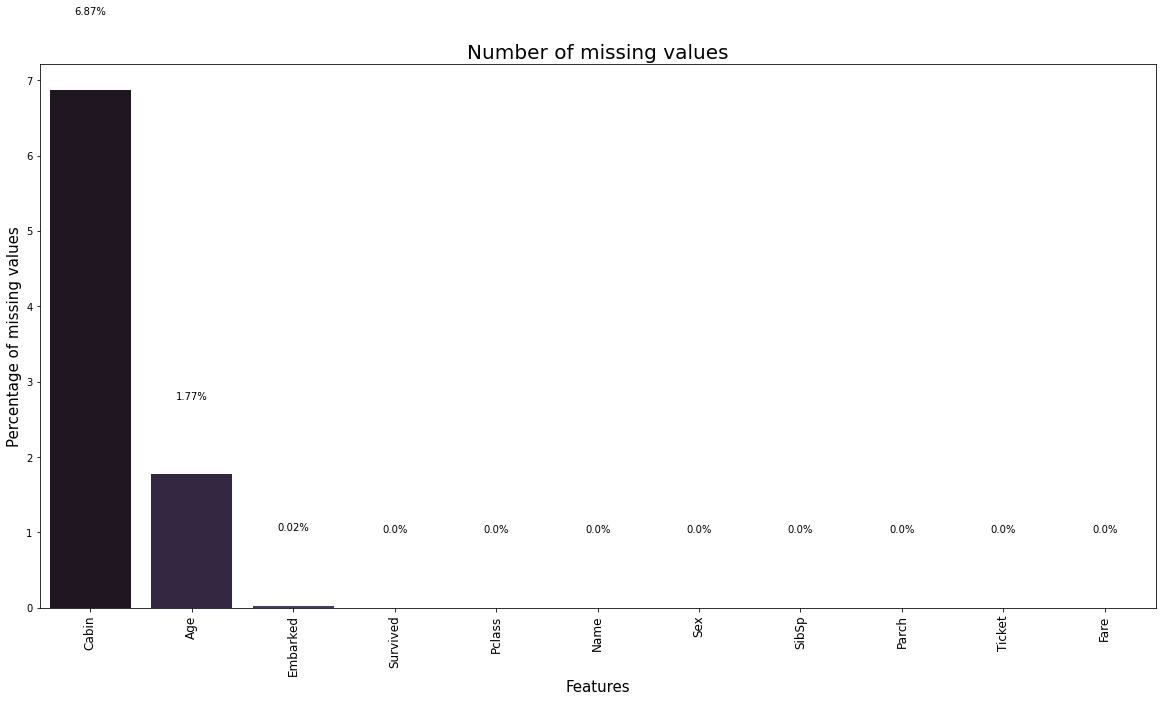

In [18]:
#Plotting missing data in descending order
plt.figure(figsize=(20, 10))
missing_data_sorted = missing_data.sort_values(ascending=False)
for index, value in enumerate(missing_data_sorted):
    plt.text(index, value+1, str(value) + "%", ha='center', fontsize=10)
sns.barplot(x=missing_data_sorted.index, y=missing_data_sorted, palette='mako')
plt.title('Number of missing values', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.show()

In the graph displaying the percentage of missing values, it is observed that the Cabin column has the highest proportion of missing data, accounting for 6.87% of the dataset. This is followed by the Age column with 1.77%, and the Embarked column with 0.02%. These findings help prioritize which columns may require imputation, removal, or further investigation during the data cleaning process.

To evaluate the relevance of the Cabin and Embarked columns, the .value_counts() function will be used to examine the available information. This will help determine whether the data in these columns are meaningful and whether it should be retained or excluded from the analysis.

In [19]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [20]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

After analyzing the data contained in the Ticket column, it has been determined that this information will not be necessary for the analysis. In addition to having a high percentage of missing values, the column does not contribute meaningful insights to the objectives of this project. For similar reasons, the Ticket column will also be removed, as it does not provide relevant information for the analysis. Therefore, both columns will be excluded from the dataset.

In [21]:
df.drop(columns=['Ticket'],inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


The missing values in the Age column will be replaced with the median of the available values. This method is chosen because the median is less sensitive to outliers and provides a more robust estimate of central tendency, making it a suitable choice for imputing missing numerical data.

In [22]:
# Fill the missing values in 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [23]:
# Verify that there are no missing values in the 'Age' column
df['Age'].isnull().sum()

0

A verification step is performed to ensure that there are no remaining missing values in the Age column after the imputation process. This confirms that the data has been successfully cleaned and is ready for further analysis.

The missing values in the Embarked column will be replaced using the mode, as it represents the most frequently occurring value in the column. This is a common approach for imputing missing values in categorical variables. After the imputation, a verification step will be conducted to ensure that no missing values remain in the Embarked column.

In [24]:
# Fill missing values in 'Embarked' with the most frequent value (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify that there are no missing values in the 'Embarked' column
df['Embarked'].isnull().sum()

0

For the missing values in the Cabin column, a new category called 'Unknown' will be created. These missing values will be replaced with this new category, allowing the column to retain its structure while handling the missing data in a meaningful way. A verification step will then be performed to ensure that there are no remaining missing values in the Cabin column after the imputation with the 'Unknown' category.

In [25]:
#Filling missing values in "Cabin" feature by creating a new category 'unknown' in the variable
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna('Unknown', inplace=True)
#Checking number of missing values
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

The Sex column and the Embarked column will be transformed into numeric values. This is necessary because algorithms such as logistic regression, decision trees, and neural networks rely on mathematical operations (such as multiplication, addition, etc.). If textual values (like "male" or "female") are provided, the algorithms would not be able to process them. Therefore, the textual values will be converted into numerical representations, allowing the model to interpret and process them correctly.

In [26]:
# Convert 'Sex' column to numeric (0 for male, 1 for female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' column to numeric (C = 0, Q = 1, S = 2)
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Verify the changes
df[['Sex', 'Embarked']].head()

,Sex,Embarked
0,0,2
1,1,0
2,1,2
3,1,2
4,0,2


By converting categorical variables into numbers, models can more easily identify patterns and make more accurate predictions. For example, by converting "male" and "female" to 0 and 1, the model can learn the relationships between these categories and the target variable (in this case, whether the passengers survived or not on the Titanic).

# 4.2 Data Visualization

We will now move on to data visualization, which is a crucial part of the analysis. Visualizing the data allows for better understanding of the patterns, distributions, and relationships within the dataset, making it easier to draw meaningful conclusions and insights.
We will now import the necessary libraries for data visualization, such as seaborn and matplotlib. These libraries will allow us to create a variety of visualizations, helping us better understand the patterns and relationships within the dataset.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

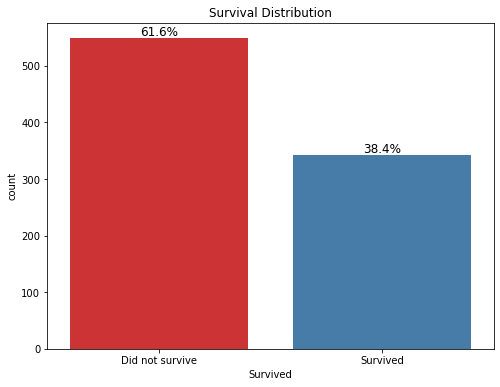

In [28]:
# Plot the distribution of the target variable 'Survived'
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
ax = sns.countplot(data=df, x='Survived', palette='Set1') 

#Title of the graphic
plt.title('Survival Distribution')

# Calculating percentages
total = len(df)  
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%',  
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom', fontsize=12) 

# Mostrar un cartel con etiquetas (fuera del gráfico)
ax.set_xticklabels(['Did not survive', 'Survived'], rotation=0)  #Adding tags

# Plot graphic
plt.show()

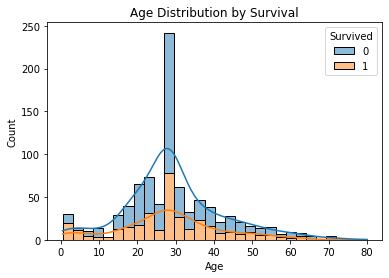

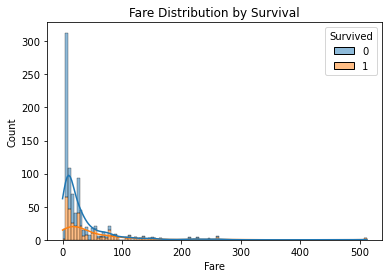

In [29]:
# Plot Age distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple="stack", kde=True)
plt.title('Age Distribution by Survival')
plt.show()

# Plot Fare distribution by Survival
sns.histplot(data=df, x='Fare', hue='Survived', multiple="stack", kde=True)
plt.title('Fare Distribution by Survival')
plt.show()

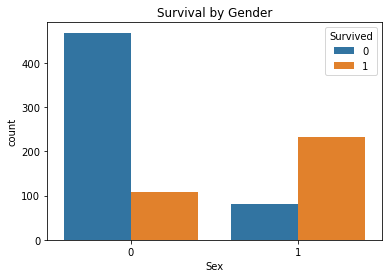

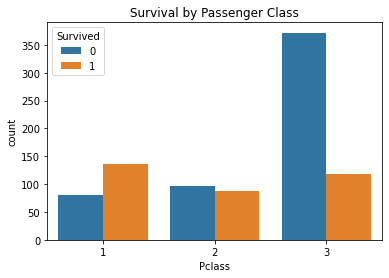

In [30]:
# Gender vs Survival
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

# Pclass (Passenger Class) vs Survival
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

# 5. Machine Learning

Now we are going to prepare the data for the model.
We will split the dataset into features (X) and the target variable (y).
The target variable is Survived (whether the passenger survived or not), and the features will include all the other columns.

In [31]:
# Define the target variable (y) and features (X)
X = df.drop(columns=['Survived'])
y = df['Survived']

We will use one part of the dataset to train the model and another part to evaluate its performance.
A common practice is to split the data using 80% for training and 20% for testing.

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To ensure that the scaling process is applied correctly, only numerical columns are considered. Non-numerical variables are excluded from this step to prevent inconsistencies during preprocessing. The column 'Name' is removed prior to the standardization process, as it contains textual data that does not contribute numerical value to the model and may interfere with feature scaling.

After selecting the numerical columns, the features are standardized using the StandardScaler, which transforms the data to have a mean of zero and a standard deviation of one. This step is essential for improving the performance of algorithms that are sensitive to the scale of the data.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
# Drop the 'Name' column and other non-numeric columns before scaling
X_train_excluded = X_train.drop(columns=['Name'])
X_test_excluded = X_test.drop(columns=['Name'])

# Select only numeric columns for scaling
X_train_numeric = X_train_excluded.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test_excluded.select_dtypes(include=['float64', 'int64'])

# Standardize the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

## 5.1 Logistic Regression

Logistic regression is selected as the initial model for this analysis. It is a fundamental binary classification algorithm, suitable for predicting whether a passenger survived or not based on the input features.

The training dataset (X_train_scaled and y_train) is used to fit the logistic regression model. This step involves adjusting the model parameters to minimize the error between the predicted and actual values, enabling the model to learn from the data.

In [35]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model with the training data
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

After training the model, it is crucial to assess its performance using the test dataset (X_test_scaled and y_test). This evaluation allows for measuring the model’s accuracy and generalizability to new, unseen data.

In [36]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Import accuracy_score to check the model's accuracy
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.45%


An accuracy of 80.45% represents a solid starting point for a predictive model, especially when working with a dataset like the Titanic. This indicates that the model correctly classified 80.45% of the passengers in the test set.

While accuracy is an important metric, it is also valuable to evaluate other performance metrics, such as the confusion matrix, precision, recall, and F1 score. These metrics provide a more comprehensive understanding of the model's performance, particularly in cases where class imbalance or misclassification of specific categories may be of concern.

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Generate the classification report (Precision, Recall, F1-score)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[90 15]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Performing cross-validation can further enhance the reliability of the model’s performance estimation. It provides a more accurate measure of the model’s ability to generalize by evaluating it on multiple subsets of the data, thus reducing the risk of overfitting and ensuring robust results.

In [38]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

Cross-validation scores: [0.82517483 0.8041958  0.78873239 0.73943662 0.80985915]
Mean cross-validation score: 0.79


The results of the cross-validation show variability in accuracy; however, the average cross-validation score is 79%, which is very close to the initial accuracy result of 80.45%. This suggests that the model demonstrates relatively stable performance across different data partitions, indicating its ability to generalize well without significant overfitting.

## 5.2 Decision Tree Classifier

The Decision Tree Classifier model will now be trained using the preprocessed data. Decision trees are a widely used machine learning algorithm that can handle both classification and regression tasks. In this case, the model will be applied for classification to predict the likelihood of survival on the Titanic.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model with the training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate accuracy
dt_y_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')

Decision Tree Accuracy: 78.21%


The Decision Tree model achieved an accuracy of 78.21% on the test dataset. This result reflects a reasonably good performance, demonstrating the model’s ability to classify the majority of instances correctly, although it may still be prone to overfitting due to its structure.

To improve the performance of the model, we will now tune the hyperparameters using GridSearchCV. This method performs an exhaustive search over a specified parameter grid and finds the best combination of hyperparameters that improves the model's performance.

In [40]:
# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f'Best parameters for Decision Tree: {dt_grid_search.best_params_}')
print(f'Best cross-validation score for Decision Tree: {dt_grid_search.best_score_:.2f}')


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.81


Instead of performing an exhaustive search like in GridSearchCV, RandomizedSearchCV randomly samples a fixed number of hyperparameter combinations from a specified grid. This can be more efficient, especially when there are many possible hyperparameters, as it explores the space more broadly but with fewer evaluations.

In [41]:
from scipy.stats import randint

# Define the parameter distribution for RandomizedSearchCV
dt_param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Perform RandomizedSearchCV for Decision Tree
dt_random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
dt_random_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f'Best parameters for Decision Tree (RandomizedSearchCV): {dt_random_search.best_params_}')
print(f'Best cross-validation score for Decision Tree (RandomizedSearchCV): {dt_random_search.best_score_:.2f}')

Best parameters for Decision Tree (RandomizedSearchCV): {'max_depth': None, 'min_samples_leaf': 14, 'min_samples_split': 19}
Best cross-validation score for Decision Tree (RandomizedSearchCV): 0.82


The Decision Tree model performed well with an accuracy of 78.21% on the test set. The highest cross-validation score of 82% suggests that the model is able to generalize effectively, particularly when RandomizedSearchCV is used to fine-tune the hyperparameters. The parameter max_depth set to None in the RandomizedSearchCV results allows the tree to grow deeper, which may enhance its ability to capture complex patterns in the data.

## 5.3 Random Forest

Next, the Random Forest model will be trained using the preprocessed data. Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to improve overall performance. It is well-suited for classification tasks, such as predicting survival on the Titanic, as it helps mitigate overfitting and enhances generalization by averaging the results of many individual decision trees.

The training will be conducted using the preprocessed training dataset (X_train_scaled and y_train), and the model will be evaluated on the test dataset (X_test_scaled and y_test).

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model with the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate accuracy
rf_y_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')

Random Forest Accuracy: 81.56%


To optimize the performance of the Random Forest model, hyperparameter tuning will be performed using GridSearchCV. This method will systematically evaluate various combinations of hyperparameters, such as the number of trees (n_estimators), the maximum depth of the trees (max_depth), and the minimum number of samples required to split a node (min_samples_split). By identifying the optimal values for these parameters, GridSearchCV ensures that the model is configured to achieve the best possible performance on the dataset.

In [43]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f'Best parameters for Random Forest: {rf_grid_search.best_params_}')
print(f'Best cross-validation score for Random Forest: {rf_grid_search.best_score_:.2f}')


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.83


The best cross-validation score obtained with this configuration was 83%, indicating strong predictive performance and robust generalization capabilities. The parameter max_depth set to None allows the individual trees in the ensemble to grow without restriction, potentially capturing more complex patterns in the data. Moreover, using a relatively small number of estimators (50) demonstrates that the model can achieve high performance without excessive computational cost.

In [44]:
# Define the parameter distribution for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Perform RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
rf_random_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f'Best parameters for Random Forest (RandomizedSearchCV): {rf_random_search.best_params_}')
print(f'Best cross-validation score for Random Forest (RandomizedSearchCV): {rf_random_search.best_score_:.2f}')


Best parameters for Random Forest (RandomizedSearchCV): {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 100}
Best cross-validation score for Random Forest (RandomizedSearchCV): 0.83


The best cross-validation score achieved with this configuration was also 83%, matching the result obtained through GridSearchCV. This consistency reinforces the reliability of the model and suggests that multiple hyperparameter combinations can lead to comparable performance. The use of RandomizedSearchCV allowed for a broader and more efficient exploration of the hyperparameter space, ultimately confirming the model’s strong generalization capacity.

## 5.4 SVM

The next algorithm implemented is the Support Vector Machine (SVM) classifier. SVM is a powerful supervised learning method used for classification tasks. It works by finding the optimal hyperplane that best separates the classes in the feature space.

In this project, the SVM model is trained using the preprocessed training data (X_train_scaled and y_train), which has been standardized to ensure that the algorithm performs effectively, given its sensitivity to the scale of the features.

In [45]:
from sklearn.svm import SVC

# Create the SVM model
svm_model = SVC(random_state=42)

# Train the model with the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate accuracy
svm_y_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')


SVM Accuracy: 81.56%


The SVM model achieved an accuracy of 81.56% on the test dataset. This result indicates strong predictive performance, demonstrating the model's ability to correctly classify a high proportion of instances. The SVM's robustness and effectiveness in handling high-dimensional data contribute to its solid performance in this classification task.

In [46]:
# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV for SVM
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f'Best parameters for SVM: {svm_grid_search.best_params_}')
print(f'Best cross-validation score for SVM: {svm_grid_search.best_score_:.2f}')


Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.82


With these parameters, the model achieved a best cross-validation score of 82%, indicating strong and consistent performance across multiple data partitions. The use of the RBF (Radial Basis Function) kernel allows the model to capture non-linear relationships in the data, while the regularization parameter C = 1 balances the trade-off between maximizing the margin and minimizing classification errors.

In [47]:
# Define the parameter distribution for RandomizedSearchCV
svm_param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform RandomizedSearchCV for SVM
svm_random_search = RandomizedSearchCV(SVC(random_state=42), svm_param_dist, cv=5, scoring='accuracy', n_iter=100, random_state=42)
svm_random_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f'Best parameters for SVM (RandomizedSearchCV): {svm_random_search.best_params_}')
print(f'Best cross-validation score for SVM (RandomizedSearchCV): {svm_random_search.best_score_:.2f}')


C:\Users\anrse\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVM (RandomizedSearchCV): {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best cross-validation score for SVM (RandomizedSearchCV): 0.82


The best cross-validation score obtained with this setup was 82%, consistent with the results from GridSearchCV. This alignment between both search methods reinforces the reliability and stability of the model’s configuration. The RBF kernel continues to demonstrate its effectiveness in capturing non-linear patterns, and the selected values for C and gamma provide a balanced model with strong generalization capabilities.

In [48]:
# Print a comparison of all models
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')

Decision Tree Accuracy: 78.21%
Random Forest Accuracy: 81.56%
SVM Accuracy: 81.56%


Among the models evaluated, Random Forest and SVM demonstrates the best overall performance. It achieved the highest accuracy on the test set with 81.56%, and also both obtained the highest cross-validation score of 83%, indicating strong generalization capabilities and robustness across different subsets of data.

While Logistic Regression and Decision Tree models also showed competitive results, with similar accuracy levels and cross-validation scores, Random Forest and SVM stands out by a small but meaningful margin in both metrics. 

## Final Evaluation

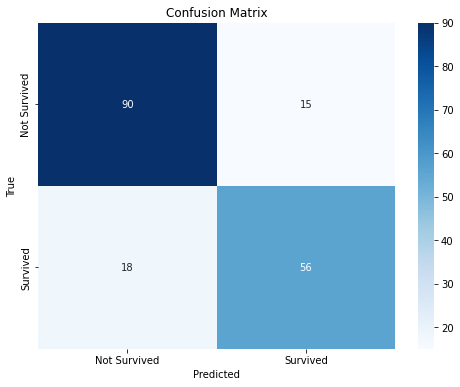

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict with the Random Forest model
y_pred = rf_model.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.79
Recall: 0.76
F1 Score: 0.77


The model's precision of 79% indicates that 79% of the passengers predicted as non-survivors were correctly classified. This reflects the model's ability to minimize false positives in predicting non-survival.

The recall of 76% reveals that the model successfully identified 76% of the actual survivors, highlighting its effectiveness in capturing true positive cases.

The F1-score of 0.77 represents a balanced trade-off between precision and recall. This value suggests that the model maintains a solid equilibrium between correctly identifying survivors and minimizing incorrect classifications, making it a reliable tool for binary classification in this context.

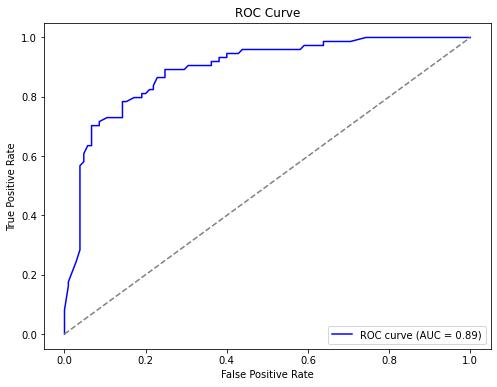

In [51]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [52]:
print(f'AUC: {roc_auc:.2f}')


AUC: 0.89


The Area Under the ROC Curve (AUC) is a metric that evaluates the model's ability to distinguish between the two classes—in this case, “Survived” and “Did not survive.” An AUC value of 0.89 indicates that the model has an 89% probability of correctly distinguishing between a randomly chosen survivor and a non-survivor.

This score demonstrates excellent classification capability. In general, an AUC above 0.80 is considered strong, as it reflects a high degree of separability between the classes. Therefore, an AUC of 0.89 confirms that the model performs very well in differentiating the survival status of passengers.

# Conclusions

**1.** Random Forest has proven to be an excellent model for this binary classification problem (survived/non-survived) using the Titanic dataset. The model’s performance has been very solid, particularly its ability to distinguish between classes, with an AUC of 0.89. This AUC value indicates that the model has a high capability to correctly classify passengers as survivors or non-survivors, which is crucial for this problem.

The performance metrics are also favorable. The accuracy of 79%, recall of 76%, and F1-score of 77% show that the model maintains a good balance between making correct predictions and correctly identifying survivors.

**2.** An AUC close to 1 is a strong indicator that the model has a great ability to distinguish between the two classes, in this case, survivors and non-survivors. The 0.89 value confirms that the model performs exceptionally well and has high classification capability.

**3.** The model's precision of 79% means that it correctly predicted 79% of the passengers who did not survive. While the performance is good, there is slight room for improvement in terms of correctly predicting non-survivors.

**4.** The recall of 76% indicates that the model successfully identified 76% of the actual survivors. This is a solid result, but there is still room for improvement in reducing false negatives (i.e., survivors who were incorrectly classified as non-survivors).

**5.** The F1-score of 77% is quite solid and indicates a good balance between precision and recall. This value is important in scenarios where both precision and recall are critical, such as predicting survivors, where both false positives and false negatives should be minimized.

**6.** During the analysis, missing values were effectively handled. The 'Age' and 'Embarked' columns were imputed appropriately: 'Age' was filled with the median, and 'Embarked' was filled with the mode. This handling of missing data allowed the model to function properly without issues related to incomplete data.

The transformation of categorical variables into numerical variables, such as converting 'Sex' to binary values (0/1), and the normalization of features, were key preprocessing steps that helped improve the model's effectiveness.

**7.** Although the model demonstrates strong performance, there are potential areas for enhancement:
Adjusting the classification threshold to improve recall, prioritizing the identification of survivors at the cost of a lower precision.
Using class balancing techniques if the dataset becomes highly imbalanced in future applications (though this was not necessary in the current case).
Evaluating other models such as XGBoost or LightGBM, which could also yield strong results for binary classification tasks. 

**8.** The Random Forest model, after preprocessing adjustments and hyperparameter optimization, demonstrates solid performance in predicting the survival of Titanic passengers. The model achieves a good balance between accuracy and recall, with a strong ability to distinguish between the classes, as indicated by the AUC of 0.89.